# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
plt.style.use('seaborn')

# IMPORTING DATASET

In [2]:
dataset=pd.read_csv('daily.csv')
dataset

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5475,2018-10-09,3.40
5476,2018-10-10,3.45
5477,2018-10-11,3.16
5478,2018-10-12,3.19


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.describe()

,Price
count,5479.000000
mean,4.334855
std,2.211151
min,1.050000
25%,2.770000
50%,3.720000
75%,5.470000
max,18.480000


In [5]:
dataset.info

<bound method DataFrame.info of             Date  Price
0     1997-01-07   3.82
1     1997-01-08   3.80
2     1997-01-09   3.61
3     1997-01-10   3.92
4     1997-01-13   4.00
...          ...    ...
5475  2018-10-09   3.40
5476  2018-10-10   3.45
5477  2018-10-11   3.16
5478  2018-10-12   3.19
5479  2018-10-15   3.26

[5480 rows x 2 columns]>

# DATA VISUALIZATION

In [6]:
df=pd.DataFrame(dataset)
df['day']=pd.DatetimeIndex(df['Date']).day
print(df)

            Date  Price  day
0     1997-01-07   3.82    7
1     1997-01-08   3.80    8
2     1997-01-09   3.61    9
3     1997-01-10   3.92   10
4     1997-01-13   4.00   13
...          ...    ...  ...
5475  2018-10-09   3.40    9
5476  2018-10-10   3.45   10
5477  2018-10-11   3.16   11
5478  2018-10-12   3.19   12
5479  2018-10-15   3.26   15

[5480 rows x 3 columns]


In [7]:
df['month']=pd.DatetimeIndex(df['Date']).month
print(df)

            Date  Price  day  month
0     1997-01-07   3.82    7      1
1     1997-01-08   3.80    8      1
2     1997-01-09   3.61    9      1
3     1997-01-10   3.92   10      1
4     1997-01-13   4.00   13      1
...          ...    ...  ...    ...
5475  2018-10-09   3.40    9     10
5476  2018-10-10   3.45   10     10
5477  2018-10-11   3.16   11     10
5478  2018-10-12   3.19   12     10
5479  2018-10-15   3.26   15     10

[5480 rows x 4 columns]


In [8]:
df['year']=pd.DatetimeIndex(df['Date']).year
print(df)

            Date  Price  day  month  year
0     1997-01-07   3.82    7      1  1997
1     1997-01-08   3.80    8      1  1997
2     1997-01-09   3.61    9      1  1997
3     1997-01-10   3.92   10      1  1997
4     1997-01-13   4.00   13      1  1997
...          ...    ...  ...    ...   ...
5475  2018-10-09   3.40    9     10  2018
5476  2018-10-10   3.45   10     10  2018
5477  2018-10-11   3.16   11     10  2018
5478  2018-10-12   3.19   12     10  2018
5479  2018-10-15   3.26   15     10  2018

[5480 rows x 5 columns]


In [9]:
x=dataset.iloc[:,2:5]
x

,day,month,year
0,7,1,1997
1,8,1,1997
2,9,1,1997
3,10,1,1997
4,13,1,1997
...,...,...,...
5475,9,10,2018
5476,10,10,2018
5477,11,10,2018
5478,12,10,2018


In [10]:
y=dataset.iloc[:,1:2]
y

,Price
0,3.82
1,3.80
2,3.61
3,3.92
4,4.00
...,...
5475,3.40
5476,3.45
5477,3.16
5478,3.19


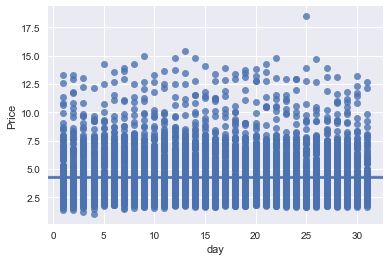

In [11]:
x=df['day']
y=df['Price']
sns.regplot(x,y,data=dataset)

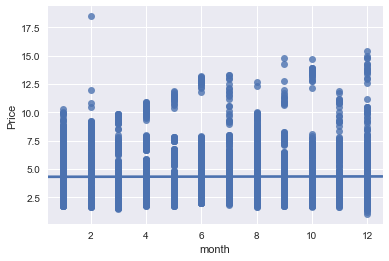

In [12]:
x=df['month']
y=df['Price']
sns.regplot(x,y,data=dataset)

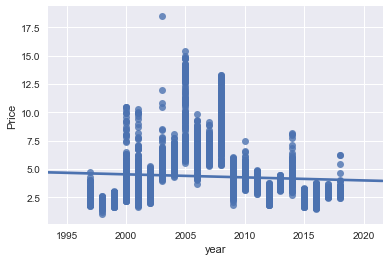

In [13]:
x=df['year']
y=df['Price']
sns.regplot(x,y,data=dataset)

Text(0.5, 1.0, 'Month vs Oil Prices')

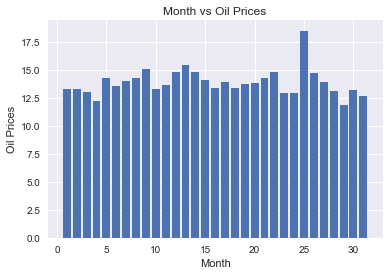

In [14]:
plt.bar(df['day'],df['Price'],align='center')
plt.ylabel("Oil Prices")
plt.xlabel("Month")
plt.title("Month vs Oil Prices")

Text(0.5, 1.0, 'Month vs Oil Prices')

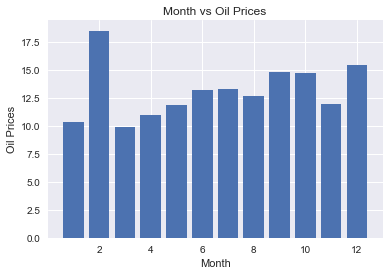

In [15]:
plt.bar(df['month'],df['Price'],align='center')
plt.ylabel("Oil Prices")
plt.xlabel("Month")
plt.title("Month vs Oil Prices")

Text(0.5, 1.0, 'Year vs Oil Prices')

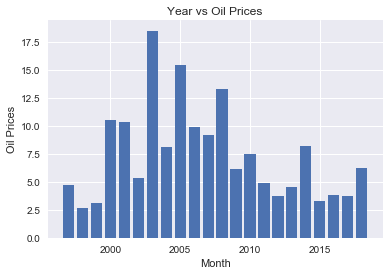

In [16]:
plt.bar(df['year'],df['Price'],align='center')
plt.ylabel("Oil Prices")
plt.xlabel("Month")
plt.title("Year vs Oil Prices")

Text(0.5, 1.0, 'year-month vs Oil prices')

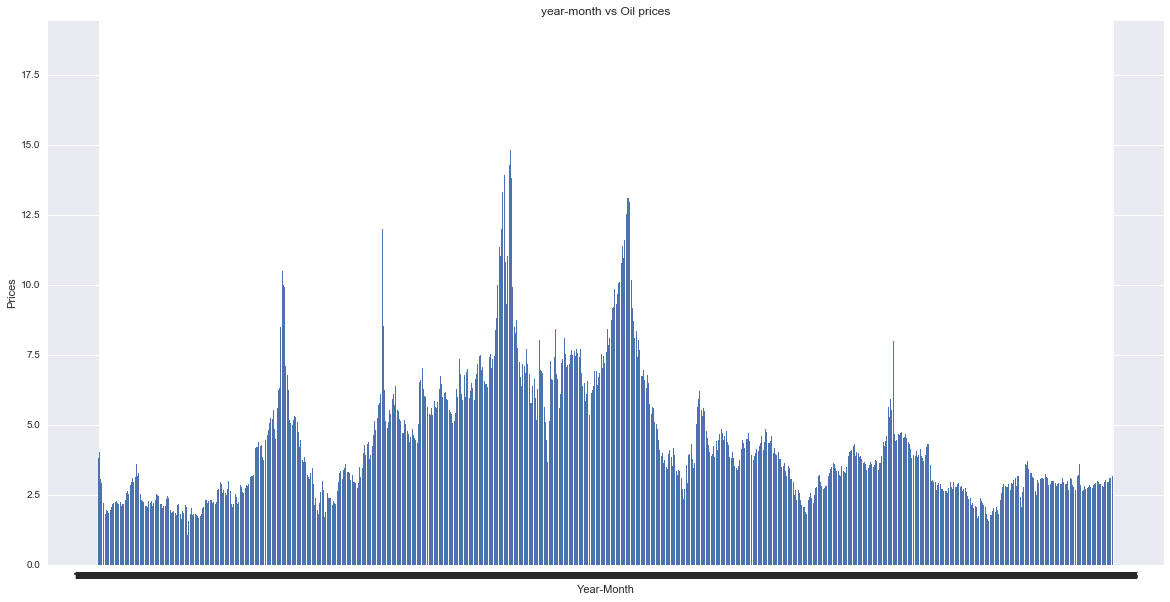

In [19]:
plt.rcParams["figure.figsize"] = (20,10)
x=df['Date']
y=df['Price']
plt.bar(x,y)
plt.xlabel('Year-Month')
plt.ylabel('Prices')
plt.title("year-month vs Oil prices")

# TAKING CARE OF MISSING DATA

In [17]:
dataset.isnull().any()

Date     False
Price     True
day      False
month    False
year     False
dtype: bool

In [18]:
dataset['Price'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5475    False
5476    False
5477    False
5478    False
5479    False
Name: Price, Length: 5480, dtype: bool

In [19]:
dataset['Price'].fillna((dataset['Price'].mean()),inplace=True)
dataset

,Date,Price,day,month,year
0,1997-01-07,3.82,7,1,1997
1,1997-01-08,3.80,8,1,1997
2,1997-01-09,3.61,9,1,1997
3,1997-01-10,3.92,10,1,1997
4,1997-01-13,4.00,13,1,1997
...,...,...,...,...,...
5475,2018-10-09,3.40,9,10,2018
5476,2018-10-10,3.45,10,10,2018
5477,2018-10-11,3.16,11,10,2018
5478,2018-10-12,3.19,12,10,2018


In [20]:
dataset.isnull().any()

Date     False
Price    False
day      False
month    False
year     False
dtype: bool

In [21]:
x=dataset.iloc[:,2:5].values
x

array([[   7,    1, 1997],
       [   8,    1, 1997],
       [   9,    1, 1997],
       ...,
       [  11,   10, 2018],
       [  12,   10, 2018],
       [  15,   10, 2018]], dtype=int64)

In [22]:
y=dataset.iloc[:,1:2].values
y

array([[3.82],
       [3.8 ],
       [3.61],
       ...,
       [3.16],
       [3.19],
       [3.26]])

LABEL ENCODING and ONE HOT ENCODING isn't required as the dataset is in digits and not many categories.

# SPLITTING DATA INTO TRAIN AND TEST

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train

array([[   2,    2, 2007],
       [  25,    9, 2002],
       [  11,    5, 2004],
       ...,
       [  13,    8, 2003],
       [  22,    6, 2007],
       [  19,   12, 2007]], dtype=int64)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# TRAINING AND TESTING THE MODEL

In [25]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0,criterion="mse",max_depth=10) #default parameter is MSE so need not give

dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [26]:
import pickle
pickle.dump(dt,open('decision1.pkl','wb'))

In [27]:
y_predict=dt.predict(x_test)
y_predict

array([6.74514706, 2.38454545, 2.15      , ..., 3.94285714, 3.402     ,
       3.83272727])

In [28]:
dt.predict([[25,9,2003]])

array([3.21])

# EVALUATION

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,dt.predict(x_test))

0.9710931269396219

In [31]:
r2_score(y_train,dt.predict(x_train))

0.9845384167078804

C:\Users\Yasha\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


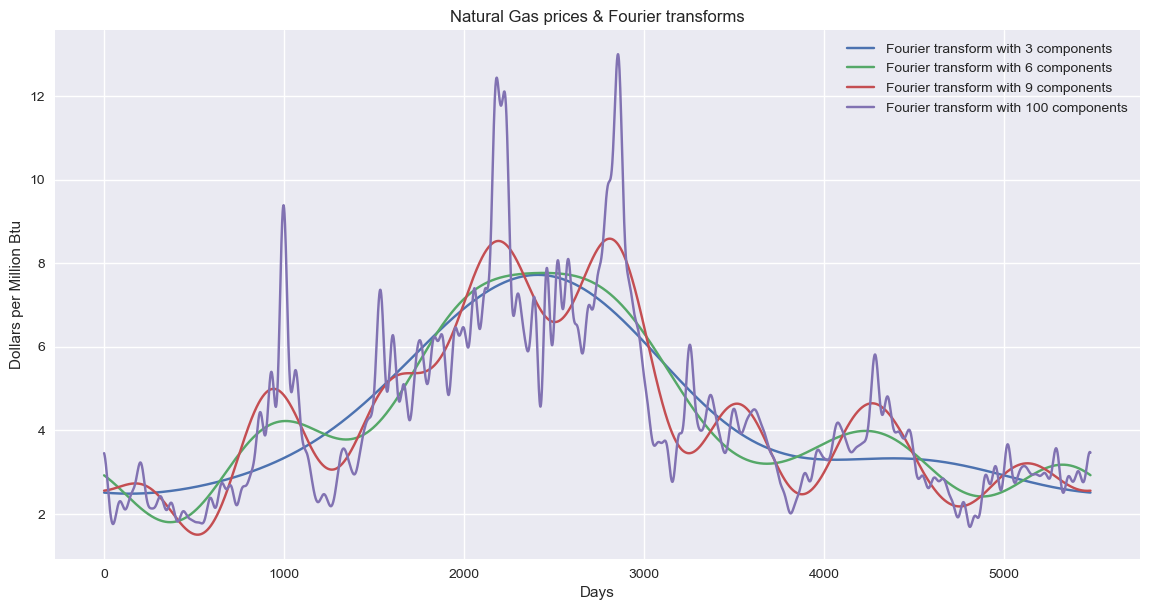

In [32]:
ng_fft = np.fft.fft(np.asarray(dataset['Price'].tolist()))
fft_df = pd.DataFrame({'fft':ng_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))

plt.xlabel('Days')
plt.ylabel('Dollars per Million Btu')
plt.title('Natural Gas prices & Fourier transforms')
plt.legend()
plt.show()

C:\Users\Yasha\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.314366 to fit



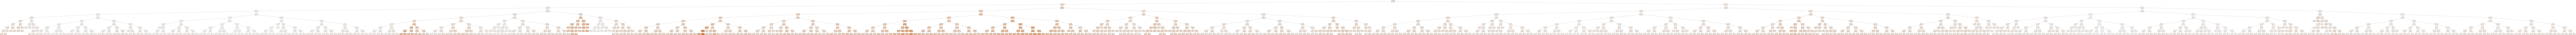

In [33]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
#from PIL import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_png("decision2.png")
#Image.open('decision2.png')
